In [1]:
#!/usr/bin/env python
################################################################
#  Copyright (C) 2015 OpenEye Scientific Software, Inc.
################################################################
from __future__ import print_function
import os, sys
import pandas as pd
import scipy.stats as stats
import scipy as sci
import numpy as np
import pylab
get_ipython().magic(u'matplotlib inline')

In [2]:
import openeye.oechem as oechem
import openeye.oedepict as oedepict
from IPython.display import display

In [3]:
def depict(mol, width=500, height=200):
    from IPython.display import Image
    dopt = oedepict.OEPrepareDepictionOptions()
    dopt.SetDepictOrientation( oedepict.OEDepictOrientation_Horizontal)
    oedepict.OEPrepareDepiction(mol, dopt)
    opts = oedepict.OE2DMolDisplayOptions(width, height, oedepict.OEScale_AutoScale)
    disp = oedepict.OE2DMolDisplay(mol, opts)
    ofs = oechem.oeosstream()
    oedepict.OERenderMolecule(ofs, 'png', disp)
    ofs.flush()
    return Image(data = "".join(ofs.str()))

In [4]:
def depictMatch(mol, match, supH = True, width=500, height=200):
    from IPython.display import Image
    dopt = oedepict.OEPrepareDepictionOptions()
    dopt.SetDepictOrientation( oedepict.OEDepictOrientation_Horizontal)
    dopt.SetSuppressHydrogens(supH)
    oedepict.OEPrepareDepiction(mol, dopt)
    opts = oedepict.OE2DMolDisplayOptions(width, height, oedepict.OEScale_AutoScale)
    disp = oedepict.OE2DMolDisplay(mol, opts)
    hstyle = oedepict.OEHighlightStyle_Color
    hcolor = oechem.OEColor(oechem.OELightBlue)
    oedepict.OEAddHighlighting(disp, hcolor, hstyle, match)
    ofs = oechem.oeosstream()
    oedepict.OERenderMolecule(ofs, 'png', disp)
    ofs.flush()
    return Image(data = "".join(ofs.str()))

In [5]:
Smarts = '[#6X4:1]-[#6X4]-[#8X2:2]'
qmol = oechem.OEQMol()
if not oechem.OEParseSmarts( qmol, Smarts ):
    print( 'OEParseSmarts failed')
ss = oechem.OESubSearch( qmol)

In [6]:
fileprefix= 'AlkEthOH_dvrs1'
ifs = oechem.oemolistream(fileprefix+'.oeb')
#ofs = oechem.oemolostream(fileprefix+'_filt1.smi')

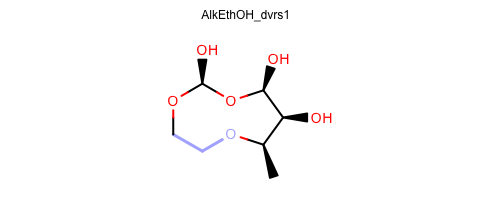

1 0 7 
1 0 2 

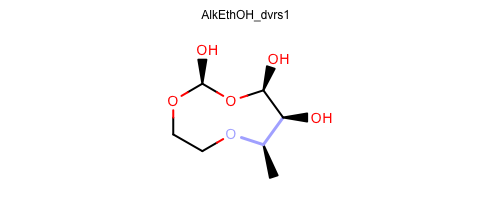

2 3 7 
1 0 2 

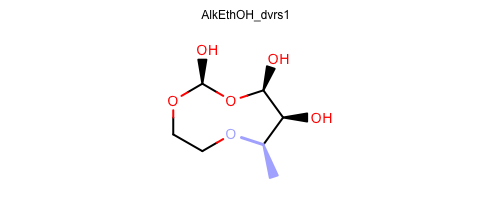

6 3 7 
1 0 2 

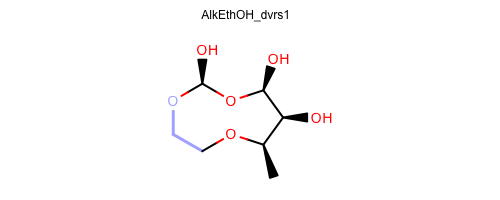

0 1 8 
1 0 2 

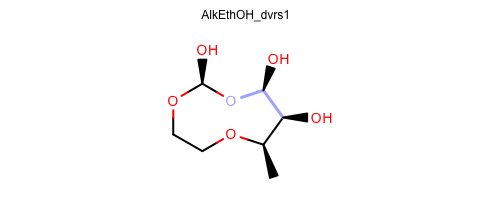

2 4 9 
1 0 2 

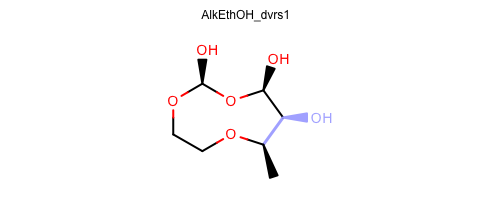

3 2 10 
1 0 2 

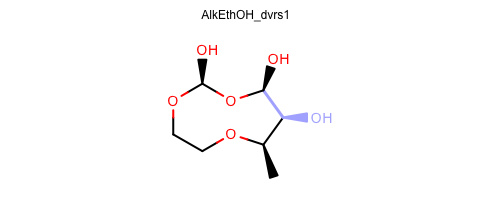

4 2 10 
1 0 2 

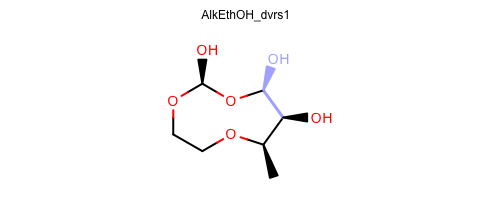

2 4 11 
1 0 2 

In [7]:
mol = oechem.OEMol()
for mol in ifs.GetOEMols():
    goodMol = True
    oechem.OEPrepareSearch(mol, ss)
    unique = True
    for match in ss.Match(mol, unique):
        display( depictMatch(mol, match))
        for ma in match.GetAtoms():
            print(ma.target.GetIdx(), end=" ")
            #print(ma.pattern.GetIdx(), end=" ")
        print('')
        for ma in match.GetAtoms():
            print(ma.pattern.GetMapIdx(), end=" ")

In [8]:
ifs.close()
#ofs.close()